In [1]:
#importing necessary libraries
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#plotting using traditional calculation
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.optimize
from scipy.stats import cauchy
import statistics

[[75 75 75 ...  0  0  0]
 [75 75 75 ...  0  0  0]
 [75 75 75 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


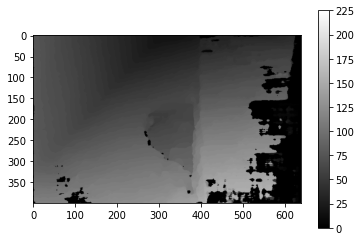

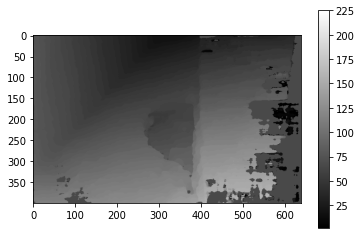

In [51]:
# disparity = np.load('depth_image_1.npy')
disparity = np.load('image_1.npy')
print(disparity)
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()
sum_dis = 0
disp_no =0
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        sum_dis= sum_dis + disparity[i][j]
        disp_no = disp_no + 1
avg_dis = sum_dis/disp_no
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if(disparity[i][j] == 0):
            disparity[i][j] = avg_dis
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()

[75 75 75 ... 66 66 66]


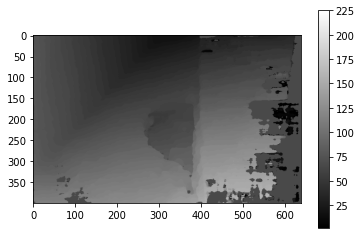

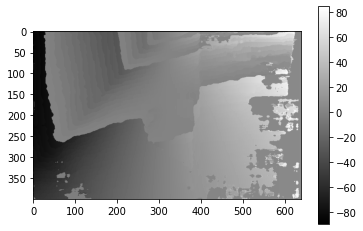

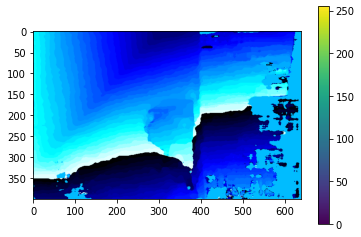

In [52]:
image_centre_h = disparity.shape[0]/2
image_centre_w = disparity.shape[1]/2
d = disparity.flatten()
print(d)

''' Projects points from 2d to 3d using disparity to calculate Z coordinates'''

points = []

# f = 800.74853515625
f = 882.5
B = 7.5
maxdisp = 95
height1, width1 = disparity.shape[:2]

# assume a minimal disparity of 2 pixels is possible to get Zmax
# and then get reasonable scaling in X and Y output

#Zmax = ((f * B) / 2)
a=0
x3d=[]
y3d=[]
z3d=[]

for y in range(height1):# 0 - height is the y axis index
    for x in range(width1):# 0 - width is the x axis index

        # if we have a valid non-zero disparity
        if (disparity[y,x] > 0 or disparity[y,x] < 0):

            # calculate corresponding 3D point [X, Y, Z]

            Z = (f * B) / disparity[y,x]
            Zacc = ((Z*255. )/maxdisp).astype(np.uint8)
#             X = ((x - image_centre_w) * B) / disparity[y,x]
#             Y = ((y - image_centre_h) * B) / disparity[y,x]

            X = ((x - image_centre_w) * Zacc) / f
            Y = ((y - image_centre_h) * Zacc) / f

            # add to points
            x3d.append(X)
            y3d.append(Y)
#             z3d.append(Zacc)
            z3d.append(disparity[y,x])

#             if(left_img_rect.size > 0):
#                 points.append([X,Y,Z,left_img_rect[y,x]])
#             else:
            points.append([X,Y,Z])
frame = np.reshape(z3d,(height1,width1))
plt.imshow(frame, "gray")
plt.colorbar()
plt.show()

X3D =  np.reshape(x3d,(height1,width1))
Y3D =  np.reshape(y3d,(height1,width1))
# Z3d =  np.reshape(Z3D,(height1,width1))
d = disparity.flatten()
# x3d2 = X3d[250:height1,0:500]
# y3d2 = Y3d[250:height1,0:500]
# z3d2 = Z3d[250:height1,0:500]
# fo = frame[250:height1,0:500]
# dfo = fo.flatten()
# plt.imshow(fo, "gray")
# plt.colorbar()
# plt.show()

# x3d = x3d2.flatten()
# y3d = y3d2.flatten()
# z3d = z3d2.flatten()

maxdisp = 95
dis = (disparity * 255. / maxdisp).astype(np.uint8)
plt.imshow(X3D , "gray")
plt.colorbar()
plt.show()

fra = cv2.applyColorMap(dis, cv2.COLORMAP_HOT)
plt.imshow(fra)
plt.colorbar()
plt.show()

z_act = np.copy(z3d)

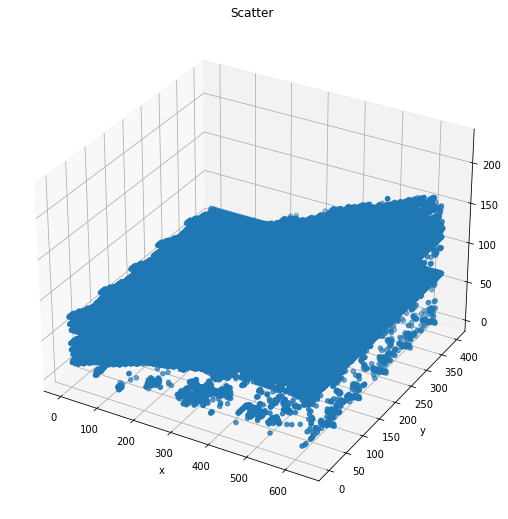

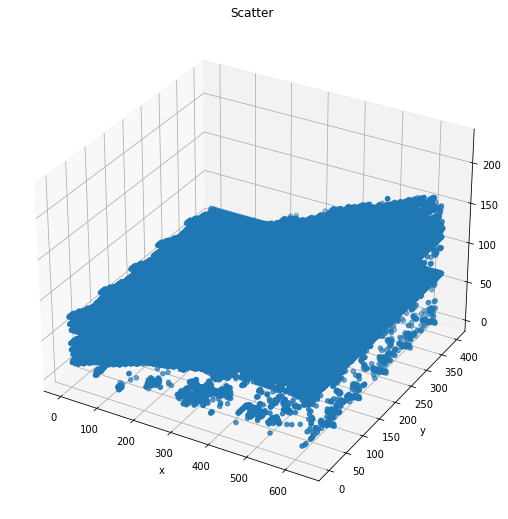

In [54]:
fig = plt.figure(figsize =(14, 9))
w=[]
h=[]
for i in range(width1):
    for j in range(height1):
        w.append(i)
        h.append(j)
# ax = plt.axes(projection ='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(w,h , d)
plt.show()

fig = plt.figure(figsize =(14, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(w,h , z3d)
plt.show()

Average 123.82862109375


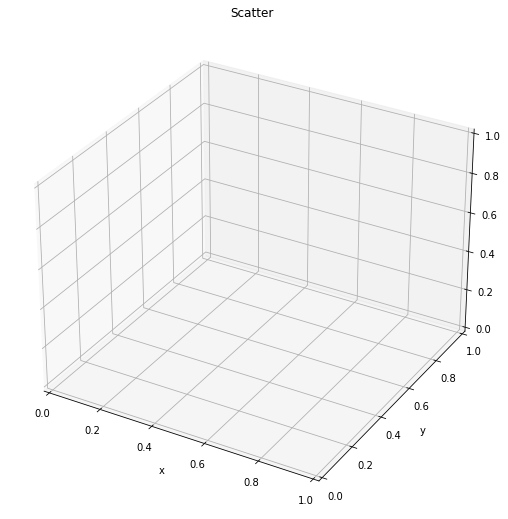

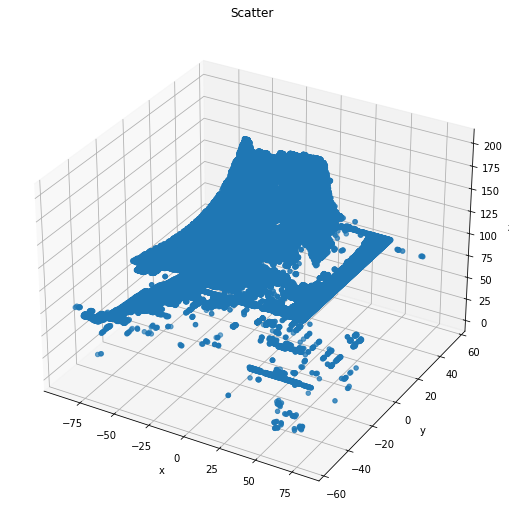

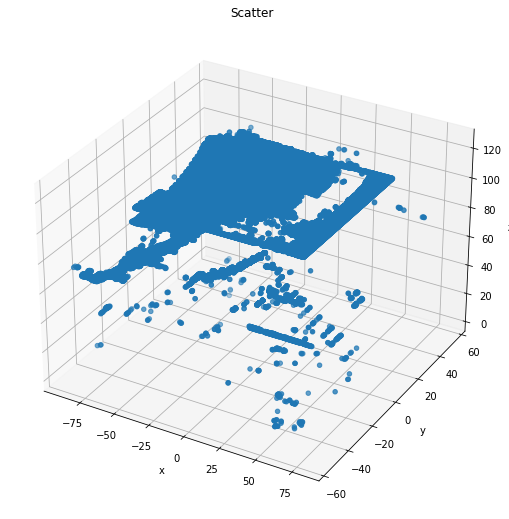

In [43]:
depth = z3d
#di = -depth
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
# ax.plot_surface(z1,x1,y1,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
# surf3 = ax.plot_surface(z1, x1, y1,
#                        cmap = my_cmap,
#                        edgecolor ='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


u = 0
l = 0
z_avg =sum(z_act)/len(z3d)
# z_median= statistics.median(z3d)
    
print("Average", z_avg)

z3d1 = []
z3d2 = []
freq= []
# for i in range(len(z3d)):
#     for j in range(len(z3d)):
#         if(z3d[j] == z3d[i]):
#             f= f+1
#             freq.append(f)
# z_best = z3d[freq.index(max(freq))]
# print(z_best)
for i in range(len(z3d)):
    if(z3d[i] < z_avg):
        z3d1.append(z_avg)
    else:
        z3d1.append(z3d[i])
for i in range(len(z3d)):
    if(z3d[i]>z_avg):
        z3d2.append(z_avg)
    else:
        z3d2.append(z3d[i])
# for i in range(len(z_b)):
#     if z_b[i] < z_avg - 30:
#         z_b[i] = z_avg

# for i in range(len(z3d)):
#     if z3d[i] < z_avg:
#         z3d[i] = z_avg

        
# ax.scatter(x3d, z3d , y3d)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
# plt.show()
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x3d, y3d , z3d)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
ax.scatter(x3d, y3d , z3d1)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
# fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
# ax = fig.add_subplot(111, projection='3d')
# ax.set_title('Scatter')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# ax.scatter(x3d, y3d , z3d1)
# # fig.colorbar(surf3, shrink=0.5, aspect=5)
# plt.show()

fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x3d, y3d , z3d2)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()


[ 1.32936579e+02  6.44705067e-02  5.57996198e-01 -2.50884139e-03
 -1.51046622e-03  1.54085802e-02]


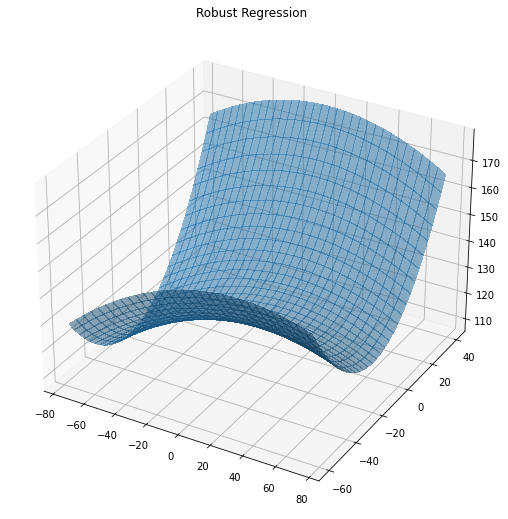

In [49]:
def fun_residual(cf, vars, z):
    x, y = vars
    return (( cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y ) - z)**2

def fun_z(cf, x, y):

    return cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y 


# cf0 = np.ones(6)
cf0 = np.zeros(6)

res_robust = scipy.optimize.least_squares(fun_residual, cf0, loss='cauchy', f_scale=100, args=((np.array(x3d), np.array(y3d)), np.array(z3d1)))

x = np.linspace(-75, 75, 32)

y = np.linspace(-60, 40, 32)

xv, yv = np.meshgrid(x, y)
cfs = res_robust.x
print(cfs)
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.47367e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()
[[-0.00122754 -0.23217132  0.39632354  0.01052215 -0.0101326   0.10471155]]
[[  5.16581021 238.10267177 237.80721738 ...   1.60681953   1.6089902
    1.6111852 ]
 [  5.13474849 236.19326096 235.89728094 ...   1.56829893   1.5704579
    1.57264119]
 [234.59231142 234.29471408 233.99820843 ...   1.53002035   1.53216761
    1.53433918]
 ...
 [ 11.857935    11.83996579  11.8220209  ...   5.33777126   5.33529332
    5.33283969]
 [ 11.92295221  11.90497129  11.88701469 ...   5.3953296    5.39283994
    5.39037461]
 [ 11.98821143  11.9702188   11.95225049 ...   5.45312994   5.45062858
    5.44815153]]


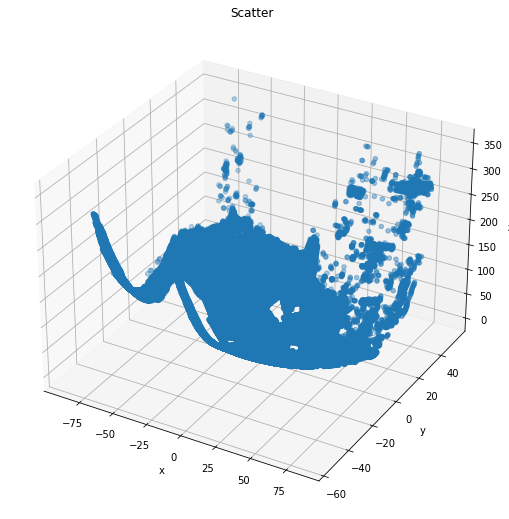

[[-75.         -75.         -75.         ... -75.         -75.
  -75.        ]
 [-70.16129032 -70.16129032 -70.16129032 ... -70.16129032 -70.16129032
  -70.16129032]
 [-65.32258065 -65.32258065 -65.32258065 ... -65.32258065 -65.32258065
  -65.32258065]
 ...
 [ 65.32258065  65.32258065  65.32258065 ...  65.32258065  65.32258065
   65.32258065]
 [ 70.16129032  70.16129032  70.16129032 ...  70.16129032  70.16129032
   70.16129032]
 [ 75.          75.          75.         ...  75.          75.
   75.        ]]


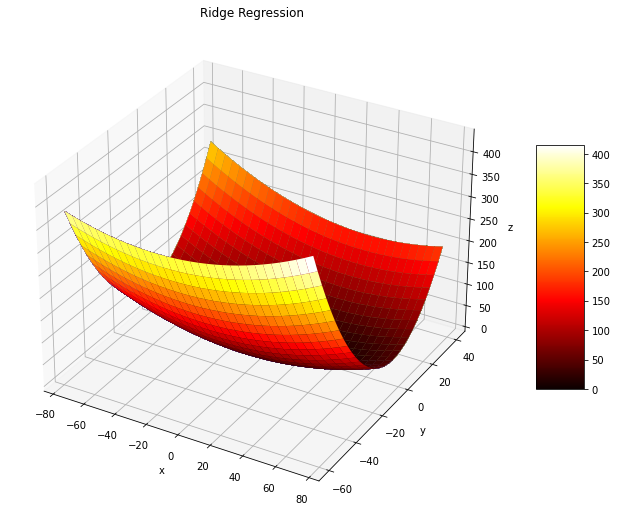

In [31]:
sx1=0
SMx =[]
sy1=0
SMy =[]
sy2=0
SMy2 =[]
sx2=0
SMx2 =[]
sx3=0
SMx3 =[]
sxy=0
SMxy =[]
sx2y=0
SMx2y =[]
sxy2=0
SMxy2 =[]
sy3=0
SMy3 =[]
sx4 = 0
SMx4=[]
sy4 = 0
SMy4=[]
sx3y = 0
SMx3y=[]
sx3y2 = 0
SMx3y2=[]
sx2y2=0
SMx2y2 =[]
sxy3=0
SMxy3 =[]
sz1=0
SMz1 =[]
sxz=0
SMxz =[]
szy=0
SMzy =[]
sx2z=0
SMx2z =[]
sxyz =0
SMxyz = []
sy2z=0
SMy2z =[]
sz1=0
SMz=[]
s=0
for i in range(len(x3d)):
    s= s+i
    sx1 = sx1 + x3d[i]
    SMx.append(sx1)
    sy1 = sy1 + y3d[i]
    SMy.append(sy1)
    sx2 = sx2+ x3d[i]**2
    SMx2.append(sx2)
    sy2 = sy2 + y3d[i]**2
    SMy2.append(sy2)
    sxy = sxy + x3d[i]*y3d[i]
    SMxy.append(sxy)
    sx3 = sx3+ x3d[i]**3
    SMx3.append(sx3)
    sx2y = sx2y+ (x3d[i]**2)*(y3d[i])
    SMx2y.append(sx2y)
    sxy2 = sxy2 + (x3d[i])*(y3d[i]**2)
    SMxy2.append(sxy2)
    sy3 = sy3 + y3d[i]**3
    SMy3.append(sy3)
    sx4 = sx4 + x3d[i]**4
    SMx4.append(sx4)
    sy4 = sy4 + y3d[i]**4
    SMy4.append(sy4)
    sx3y2 = sx3y2 +(x3d[i]**3)*(y3d[i]**2)
    SMx3y2.append(sx3y2)
    sx3y = sx3y + (x3d[i]**3)*(y3d[i])
    SMx3y2.append(sx3y)
    sx2y2 = sx2y2 + (x3d[i]**2)*(y3d[i]**2)
    SMx2y2.append(sx2y2)
    sxy3 = sxy3 + (x3d[i])*(y3d[i]**3)
    SMxy3.append(sxy3)
    sz1 = sz1 + z3d1[i]
    SMz.append(sz1)
    sxz = sxz + x3d[i]*z3d1[i]
    SMxz.append(sxz)
    szy = szy + z3d1[i]*y3d[i]
    SMzy.append(szy)
    sx2z = sx2z + (x3d[i]**2)*(z3d1[i])
    SMx2z.append(sx2z)
    sxyz = sxyz + (x3d[i])*(y3d[i])*(z3d1[i])
    SMxyz.append(sxyz)
    sy2z = sy2z + (y3d[i]**2)*(z3d1[i])
    SMy2z.append(sy2z)
#plot using ridge regression
reg2 = linear_model.Ridge()
reg2.fit([[s,sx1,sy1,sx2,sxy,sy2],[sx1,sx2,sxy,sx3,sx2y,sxy2],[sy1,sxy,sy2,sx2y,sxy2,sy3],[sx2,sx3,sx2y,sx4,sx3y2,sx3y],[sxy,sx2y,sxy2,sx3y,sx2y2,sxy3],[sy2,sxy2,sy3,sx2y2,sxy3,sy4]], [[sz1],[sxz],[szy],[sx2z],[sxyz],[sy2z]])
print(reg2)
amat1=reg2.coef_
# reg1.intercept_
print(amat1)
X1=np.reshape(x3d,(height1 , width1))
Y1=np.reshape(y3d,(height1 , width1))
depthp = amat1[0,0]+ amat1[0,1]*X1 + amat1[0,2]*Y1 +  amat1[0,3]*X1*X1 + amat1[0,4]*X1*Y1 + amat1[0,5]*Y1*Y1
print(depthp)
depthplot = depthp.flatten()
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
# ax.plot_surface(z1,x1,y1,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
# surf3 = ax.plot_surface(z1, x1, y1,
#                        cmap = my_cmap,
#                        edgecolor ='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x3d, y3d , depthplot)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()

x1 = np.outer(np.linspace(-75, 75, 32), np.ones(32))
print(x1)
# z1 = x1.copy().T # transpose
y1 = np.outer(np.linspace(-60, 40, 32), np.ones(32)).T
z1 = amat1[0,0]+ amat1[0,1]*x1 + amat1[0,2]*y1 +  amat1[0,3]*x1*x1 + amat1[0,4]*x1*y1 + amat1[0,5]*y1*y1

# Creating figure
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
my_cmap = plt.get_cmap('hot')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Ridge Regression')
ax.plot_surface(x1,y1,z1,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(y1))
surf3 = ax.plot_surface(x1, y1, z1,
                       cmap = my_cmap,
                       edgecolor ='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.scatter(Z1, X1, Y1)
# ax.scatter(x3d, y3d, disparity)
fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()

In [ ]:
zpre3d=[]
for i in range(len(z3d)):
    zpre = cfs[0] + cfs[1]*x3d[i] + cfs[2]*y3d[i] + cfs[3]*x3d[i]*x3d[i] + cfs[4]*y3d[i]*x3d[i] + cfs[5]*y3d[i]*y3d[i]
    zpre3d.append(zpre)
diffx = np.array(z3d) - np.array(zpre3d)
diff = np.reshape(diffx,(height1,width1))
print(diff)
diffx = np.reshape(diff,(height1,width1))
imgblack = np.zeros([height1,width1])
for i in range(height1):
    for j in range(width1):
        if(diffx[i,j]>24):
            imgblack[i,j]=255
plt.imshow(imgblack , 'gray')
plt.colorbar()
plt.show()

[101.44144922 -69.55855078 -69.55855078 ... 101.44144922 101.44144922
 101.44144922]

101.44144921875
[[101.44144922 -69.55855078 -69.55855078 ... 101.44144922 101.44144922
  101.44144922]
 [101.44144922 -69.55855078 -69.55855078 ... 101.44144922 101.44144922
  101.44144922]
 [-69.55855078 -69.55855078 -69.55855078 ... 101.44144922 101.44144922
  101.44144922]
 ...
 [101.44144922 101.44144922 101.44144922 ... 101.44144922 101.44144922
  101.44144922]
 [101.44144922 101.44144922 101.44144922 ... 101.44144922 101.44144922
  101.44144922]
 [101.44144922 101.44144922 101.44144922 ... 101.44144922 101.44144922
  101.44144922]]


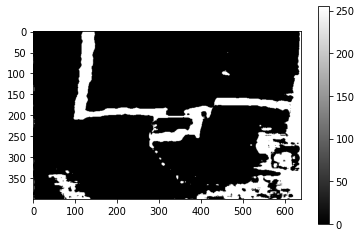

In [20]:
imgblack = np.zeros([height1,width1])
dify = np.array(z3d1) - np.array(z3d)
print(dify)
dify2d = np.reshape(dify,(height1,width1))
print()
print(dify2d[370][600])
print(dify2d)
for i in range(height1):
    for j in range(width1):
        if(dify2d[i][j] > 90):
            if(dify2d[i,j]<120):
                imgblack[i,j]=255
plt.imshow(imgblack , 'gray')
plt.colorbar()
plt.show()

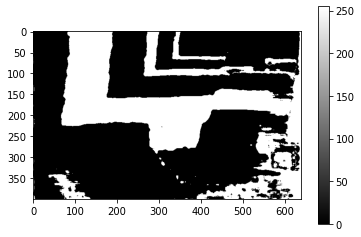

In [36]:
imgblack = np.zeros([height1,width1])
Z3D = np.reshape(z3d,(height1,width1))
for i in range(height1):
    for j in range(width1):
        if(Z3D[i][j] < 80):
            imgblack[i,j]=255
plt.imshow(imgblack , 'gray')
plt.colorbar()
plt.show()